Bank_Churn_model

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.duplicated('CustomerId').sum()

0

In [7]:
df=df.set_index('CustomerId')

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},   inplace=True)

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

In [13]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [14]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}}, inplace=True)

In [15]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [16]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
df.loc[(df['Balance']==0),'Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

In [18]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

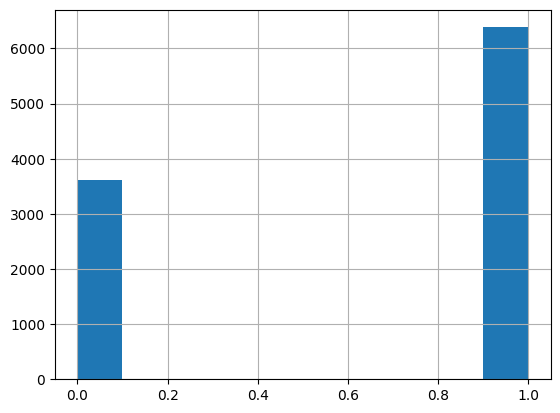

In [19]:
df['Zero Balance'].hist()

In [20]:
df.groupby(['Exited','Geography']).count()

RowNumber  Surname  CreditScore  Gender   Age  Tenure  \
Exited Geography                                                          
0      0               2064     2064         2064    2064  2064    2064   
       1               1695     1695         1695    1695  1695    1695   
       2               4204     4204         4204    4204  4204    4204   
1      0                413      413          413     413   413     413   
       1                814      814          814     814   814     814   
       2                810      810          810     810   810     810   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited Geography                                                      
0      0             2064           2064       2064            2064   
       1             1695           1695       1695            1695   
       2             4204           4204       4204            4204   
1      0              413            413        413             413   
       1              814            814        814             814   
       2              810            810        810             810   

                  EstimatedSalary  Zero Balance  
Exited Geography                                 
0      0                     2064          2064  
       1                     1695          1695  
       2                     4204          4204  
1      0                      413           413  
       1                      814           814  
       2                      810           810

In [21]:
df.columns


Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [22]:
x=df.drop(['Surname','Exited'],axis =1)

In [23]:
y=df['Exited']

In [24]:
x.shape,y.shape

((10000, 12), (10000,))

In [25]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

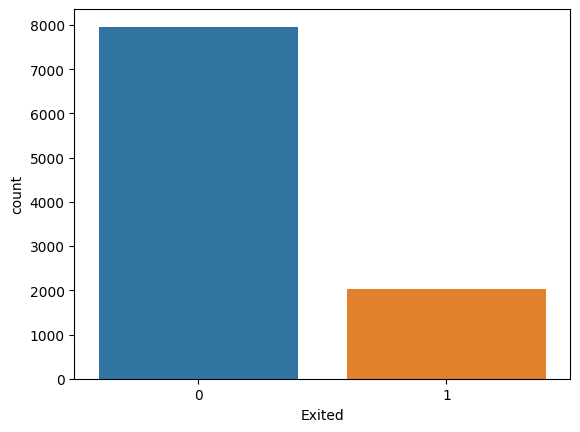

In [26]:
sns.countplot(x='Exited',data =df);

<h1>**random under sampling**</h1>

In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
rus=RandomUnderSampler(random_state=2529)

In [29]:
x_rus,y_rus=rus.fit_resample(x,y)

In [30]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [31]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
y_rus.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='Frequency'>

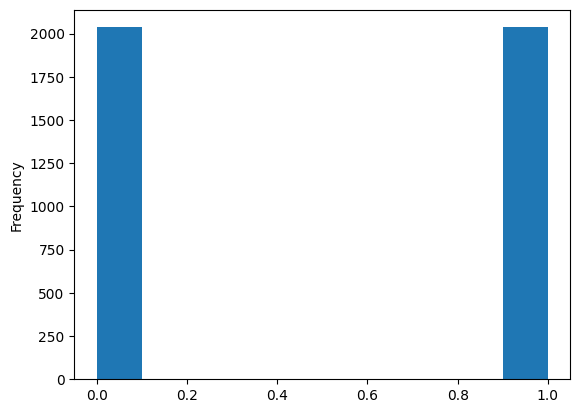

In [33]:
y_rus.plot(kind='hist')

<h1>**Random over Sampling**</h1>

In [34]:
from imblearn.over_sampling import RandomOverSampler


In [37]:
ros =RandomOverSampler(random_state=2529)

In [38]:
x_ros,y_ros=ros.fit_resample(x,y)

In [ ]:
x_ros.shape,y_ros.shape,x.shape,y.shape

In [35]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='Frequency'>

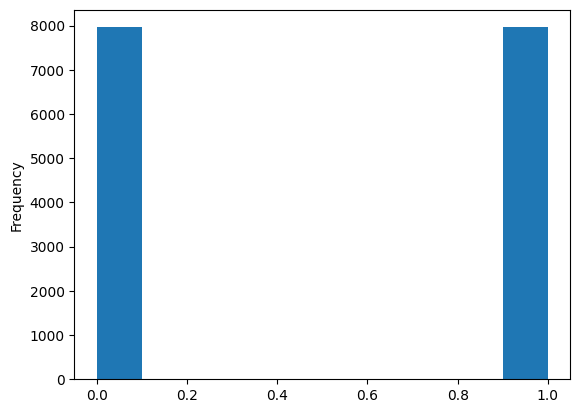

In [40]:
y_ros.plot(kind='hist')

In [41]:
#train test split
from sklearn.model_selection import train_test_split

In [42]:
#split Orginal Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [43]:
#split Random Under Sample Data
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=30)

In [44]:
#split Random over Sample data
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=30)


<h1>**standardize Features**</h1>

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()

In [47]:
x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [48]:
x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [49]:
x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [50]:
x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [51]:
x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [52]:
x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [53]:
##Support vector Machine Clssifier
from sklearn.svm import SVC

In [54]:
svc =SVC()

In [55]:
svc.fit(x_train,y_train)

SVC()

SVC()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [57]:
y_pred =svc.predict(x_test)

In [58]:
#model Accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
confusion_matrix(y_test,y_pred)

array([[2419,    0],
       [ 581,    0]])

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#Hyperparamete tunning
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid ={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [65]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [66]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [67]:
grid_predictions =grid.predict(x_test)

In [ ]:
confusion_matrix(y_test,grid_predictions)

In [71]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
svc_rus =SVC()

In [73]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

SVC()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [74]:
y_pred_rus =svc_rus.predict(x_test_rus)

In [75]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[425, 171],
       [427, 200]])

In [76]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.50      0.71      0.59       596
           1       0.54      0.32      0.40       627

    accuracy                           0.51      1223
   macro avg       0.52      0.52      0.49      1223
weighted avg       0.52      0.51      0.49      1223



In [77]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_rus.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [78]:
grid_predictions_rus =grid_rus.predict(x_test_rus)

In [79]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[596,   0],
       [167, 460]])

In [80]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       596
           1       1.00      0.73      0.85       627

    accuracy                           0.86      1223
   macro avg       0.89      0.87      0.86      1223
weighted avg       0.89      0.86      0.86      1223

